# GDC Data evaluation

## Cancer total

select y, count(*), sum(sim), sum(p), sum(lpr), sum(mr), sum(a), sum(n), sum(m), sum(k), sum(l), sum(pc), sum(b), sum(s), sum(sim)+sum(p)+sum(lpr)+sum(mr)+sum(a)+sum(n)+sum(m)+sum(k)+sum(l)+sum(pc)+sum(b)+sum(s) from (select d.year_of_diagnosis as y, c."gene.SIM1" as sim, c."gene.POMC" as p, c."gene.LEPR" as lpr, c."gene.MRAP2" as mr, c."gene.ADCY3" as a, c."gene.NTRK2" as n, c."gene.MC4R" as m, c."gene.KSR2" as k, c."gene.LEP" as l, c."gene.PCSK1" as pc, c."gene.BDNF" as b, c."gene.SH2B1" as s from cases c, diagnoses d where c.id = d.case_id) group by y;

-> count over years = 1351 = nr of diagnoses with country Of Residence at Enrollment = united states

select count(*) from cases where cases."gene.SIM1" = '1' or cases."gene.POMC" = 1 or  cases."gene.LEPR" ='1' or cases."gene.MRAP2" = 1 or cases."gene.ADCY3" = 1 or cases."gene.NTRK2" = 1 or cases."gene.MC4R"  = 1 or cases."gene.KSR2" = 1 or cases."gene.LEP" = 1 or cases."gene.PCSK1"  = 1 or cases."gene.BDNF"  =1 or  cases."gene.SH2B1" = 1;

-> diagnoses with one or more genes of obesity: 558

Query:  
- group by diagnosis.year_of_diagnosis 

In [48]:
import os
import sqlalchemy
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
#print(os.getcwd())

In [18]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/gdc.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select year_of_diagnosis, count(*) as c from diagnoses where year_of_diagnosis is not null group by year_of_diagnosis"
    gdc = pd.read_sql_query(sqlstatement_obese, conn)
    gdc['year_of_diagnosis'] = gdc['year_of_diagnosis'].astype(int)
    gdc = gdc.set_index('year_of_diagnosis')
print(gdc.dtypes)
print(gdc)

c    int64
dtype: object
                      c
year_of_diagnosis      
1978                  1
1979                  1
1982                  1
1984                  2
1986                  3
1987                  5
1988                  3
1989                  5
1990                  5
1991                  7
1992                 26
1993                 30
1994                 52
1995                 62
1996                 70
1997                 87
1998                100
1999                130
2000                174
2001                214
2002                279
2003                323
2004                436
2005                562
2006                650
2007                771
2008                969
2009               1089
2010               1407
2011               1651
2012               1424
2013                969
2014                 92
2015                 74
2016                381
2017                682
2018                200
2019                  5
2020           

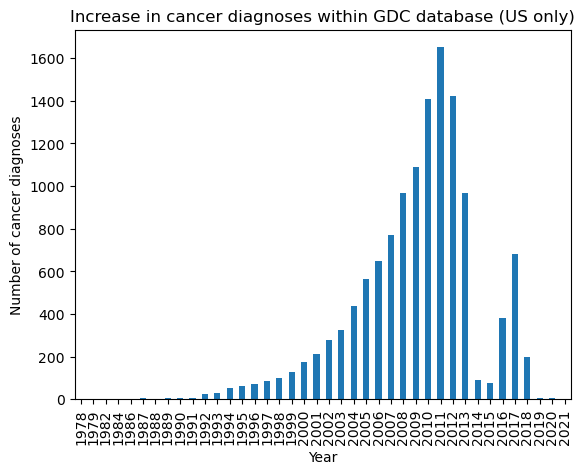

In [19]:
ax = gdc['c'].plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of cancer diagnoses', title='Increase in cancer diagnoses within GDC database (US only)');

**Elaboration**
Cancer diagnoses in the GDC NCI Genomic Data Commons are increasing for the subset marked as 
- country of residence at enrollment for the study: United States

This could come from increasing numbers of submitters and submissions and/or due to increasing numbers of diagnoses.

## Cancer by age ranges

age ranges are not possible with the data in GDC since the range of age for cancer diagnoses in US are 
- max age 29
- number aged 18 and older within the gdc data for US = 3

However the BRFSS data holds data for persons aged 18 and older.

Therefore open up GDC data to all or no definition on country of residence at enrollment with the constraint:
- the evaluation may not be valid based on the BRFSS data relating to US only
- Assumption: The inclusion of datasets from different countries will not change the evaluation





## Cancer by Genes causing or supporting obesity

select count(*) from cases where cases."gene.SIM1" = '1' or cases."gene.POMC" = 1 or  cases."gene.LEPR" ='1' or cases."gene.MRAP2" = 1 or cases."gene.ADCY3" = 1 or cases."gene.NTRK2" = 1 or cases."gene.MC4R"  = 1 or cases."gene.KSR2" = 1 or cases."gene.LEP" = 1 or cases."gene.PCSK1"  = 1 or cases."gene.BDNF"  =1 or  cases."gene.SH2B1" = 1;

correct: 558
see https://portal.gdc.cancer.gov/exploration?facetTab=genes&filters=%7B%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.demographic.country_of_residence_at_enrollment%22%2C%22value%22%3A%5B%22united%20states%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22genes.gene_id%22%2C%22value%22%3A%5B%22ENSG00000112246%22%2C%22ENSG00000115138%22%2C%22ENSG00000116678%22%2C%22ENSG00000135324%22%2C%22ENSG00000138031%22%2C%22ENSG00000148053%22%2C%22ENSG00000166603%22%2C%22ENSG00000171435%22%2C%22ENSG00000174697%22%2C%22ENSG00000175426%22%2C%22ENSG00000176697%22%2C%22ENSG00000178188%22%5D%7D%7D%5D%2C%22op%22%3A%22and%22%7D&searchTableTab=cases



In [20]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/gdc.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select year_of_diagnosis, count(*) as c from (select * from cases c, demographics d, diagnoses di where c.id = d.case_id and c.id = di.case_id and (c.\"gene.SIM1\" = '1' or c.\"gene.POMC\" = 1 or c.\"gene.LEPR\" ='1' or c.\"gene.MRAP2\" = 1 or c.\"gene.ADCY3\" = 1 or c.\"gene.NTRK2\" = 1 or c.\"gene.MC4R\"  = 1 or c.\"gene.KSR2\" = 1 or c.\"gene.LEP\" = 1 or c.\"gene.PCSK1\" = 1 or c.\"gene.BDNF\" = 1 or c.\"gene.SH2B1\" = 1)) where year_of_diagnosis is not null group by year_of_diagnosis;"
    gdc = pd.read_sql_query(sqlstatement_obese, conn)
    gdc['year_of_diagnosis'] = gdc['year_of_diagnosis'].astype(int)
    gdc = gdc.set_index('year_of_diagnosis')
print(gdc.dtypes)
print(gdc)

c    int64
dtype: object
                      c
year_of_diagnosis      
1978                  1
1979                  1
1982                  1
1984                  2
1986                  2
1987                  4
1988                  3
1989                  3
1990                  2
1991                  5
1992                 19
1993                 25
1994                 44
1995                 47
1996                 57
1997                 72
1998                 83
1999                110
2000                143
2001                168
2002                211
2003                254
2004                329
2005                407
2006                472
2007                575
2008                758
2009                843
2010               1067
2011               1253
2012               1040
2013                725
2014                 25
2015                 24
2016                212
2017                429
2018                140
2019                  2
2020           

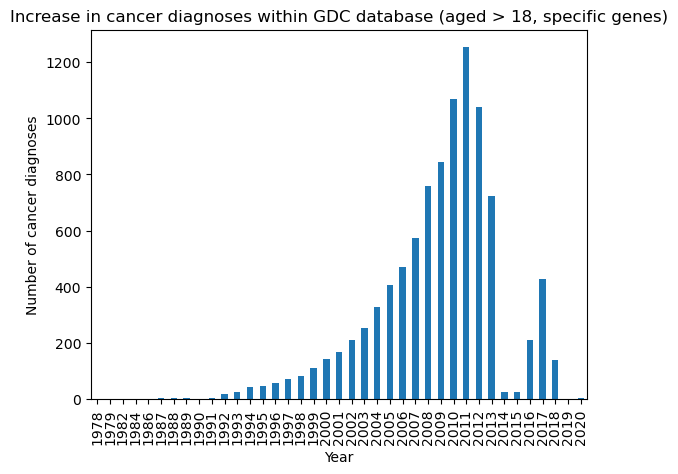

In [21]:
ax = gdc['c'].plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of cancer diagnoses', title='Increase in cancer diagnoses within GDC database (aged > 18, specific genes)');

In [22]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/gdc.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select year_of_diagnosis, year_of_diagnosis as test, count(*) as nrdiag, sum(sim), sum(p), sum(lpr), sum(mr), sum(a), sum(n), sum(m), sum(k), sum(l), sum(pc), sum(b), sum(s), sum(sim)+sum(p)+sum(lpr)+sum(mr)+sum(a)+sum(n)+sum(m)+sum(k)+sum(l)+sum(pc)+sum(b)+sum(s) as gene_sum from (select d.year_of_diagnosis, c.\"gene.SIM1\" as sim, c.\"gene.POMC\" as p, c.\"gene.LEPR\" as lpr, c.\"gene.MRAP2\" as mr, c.\"gene.ADCY3\" as a, c.\"gene.NTRK2\" as n, c.\"gene.MC4R\" as m, c.\"gene.KSR2\" as k, c.\"gene.LEP\" as l, c.\"gene.PCSK1\" as pc, c.\"gene.BDNF\" as b, c.\"gene.SH2B1\" as s from cases c, diagnoses d where c.id = d.case_id and year_of_diagnosis is not null) group by year_of_diagnosis ;"
    gdc = pd.read_sql_query(sqlstatement_obese, conn)
    gdc['year_of_diagnosis'] = gdc['year_of_diagnosis'].astype(int)
    gdc = gdc.set_index('year_of_diagnosis')
print(gdc.dtypes)
print(gdc)

test        float64
nrdiag        int64
sum(sim)      int64
sum(p)        int64
sum(lpr)      int64
sum(mr)       int64
sum(a)        int64
sum(n)        int64
sum(m)        int64
sum(k)        int64
sum(l)        int64
sum(pc)       int64
sum(b)        int64
sum(s)        int64
gene_sum      int64
dtype: object
                     test  nrdiag  sum(sim)  sum(p)  sum(lpr)  sum(mr)  \
year_of_diagnosis                                                        
1978               1978.0       1         1       0         0        1   
1979               1979.0       1         1       0         1        1   
1982               1982.0       1         1       1         1        1   
1984               1984.0       2         2       0         0        1   
1986               1986.0       3         2       1         2        2   
1987               1987.0       5         3       3         1        1   
1988               1988.0       3         1       1         1        0   
1989               1

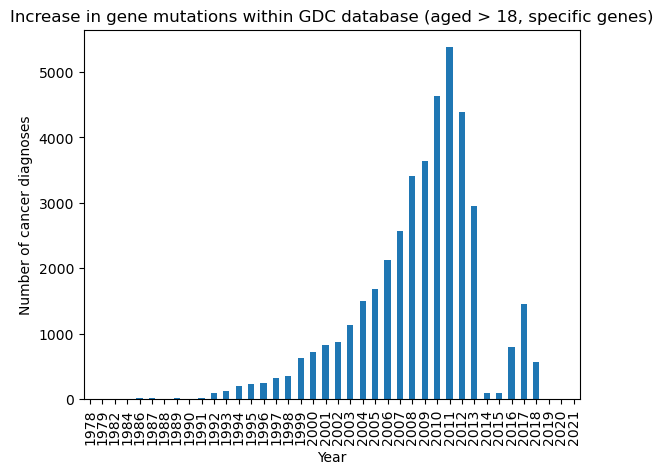

In [23]:
ax = gdc['gene_sum'].plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of cancer diagnoses', title='Increase in gene mutations within GDC database (aged > 18, specific genes)');

c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


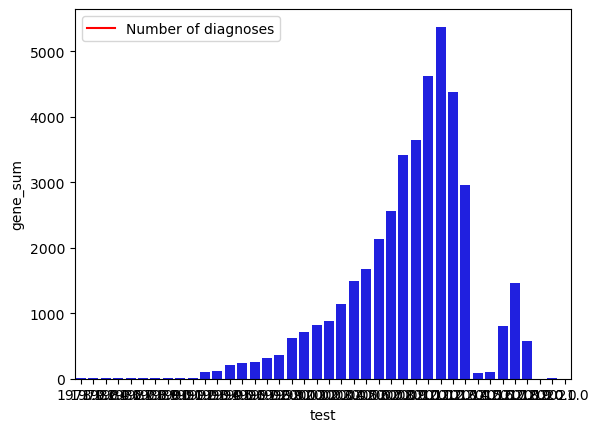

In [24]:
g = sns.lineplot(y='nrdiag', x='test', data=gdc, color='red', label='Number of diagnoses')
g = sns.barplot(y='gene_sum', x='test', data=gdc, color='blue', label='Genes mutated')

In [25]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/gdc.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select year_of_diagnosis, age_range, count(*) as c from (\
select *,\
  case\
   when age_at_diagnosis_years <18 then 'Under 18'\
   when age_at_diagnosis_years between 18 and 24 then '18-24'\
   when age_at_diagnosis_years between 25 and 34 then '25-34'\
   when age_at_diagnosis_years between 35 and 44 then '35-44'\
   when age_at_diagnosis_years between 45 and 54 then '45-54'\
   when age_at_diagnosis_years between 55 and 64 then '55-64'\
   when age_at_diagnosis_years >= 65 then '65 or older'\
 END as age_range \
 from diagnoses d\
 ) where age_range = '25-34' and year_of_diagnosis is not null group by year_of_diagnosis, age_range;"
    gdc = pd.read_sql_query(sqlstatement_obese, conn)
    gdc['year_of_diagnosis'] = gdc['year_of_diagnosis'].astype(int)
    gdc = gdc.set_index('year_of_diagnosis')
print(gdc.dtypes)
print(gdc)

age_range    object
c             int64
dtype: object
                  age_range   c
year_of_diagnosis              
1984                  25-34   1
1987                  25-34   1
1990                  25-34   2
1991                  25-34   2
1992                  25-34   2
1993                  25-34   2
1994                  25-34   8
1995                  25-34   9
1996                  25-34   4
1997                  25-34   7
1998                  25-34   6
1999                  25-34   6
2000                  25-34  11
2001                  25-34  12
2002                  25-34   7
2003                  25-34  14
2004                  25-34  21
2005                  25-34  28
2006                  25-34  31
2007                  25-34  26
2008                  25-34  47
2009                  25-34  45
2010                  25-34  70
2011                  25-34  94
2012                  25-34  68
2013                  25-34  67
2014                  25-34  11
2015              

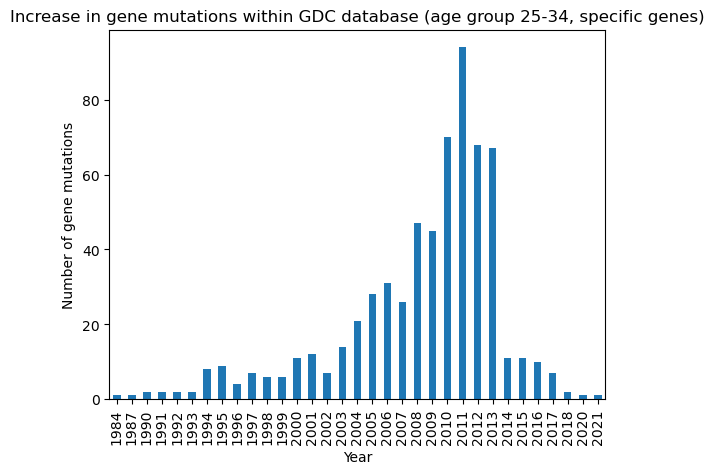

In [26]:
ax = gdc['c'].plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of gene mutations', title='Increase in gene mutations within GDC database (age group 25-34, specific genes)');

In [27]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/gdc.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_all = "select year_of_diagnosis, age_range, count(*) as c from (\
select *,\
  case\
   when age_at_diagnosis_years <18 then 'Under 18'\
   when age_at_diagnosis_years between 18 and 24 then '18-24'\
   when age_at_diagnosis_years between 25 and 34 then '25-34'\
   when age_at_diagnosis_years between 35 and 44 then '35-44'\
   when age_at_diagnosis_years between 45 and 54 then '45-54'\
   when age_at_diagnosis_years between 55 and 64 then '55-64'\
   when age_at_diagnosis_years >= 65 then '65 or older'\
 END as age_range \
 from diagnoses d \
 ) where year_of_diagnosis = '2011' and year_of_diagnosis is not null group by year_of_diagnosis, age_range;"
    gdc_2012_all = pd.read_sql_query(sqlstatement_all, conn)
    gdc_2012_all = gdc_2012_all.set_index('age_range')

    sqlstatement_all = "select year_of_diagnosis, age_range, count(*) as c from (\
select *,\
  case\
   when age_at_diagnosis_years <18 then 'Under 18'\
   when age_at_diagnosis_years between 18 and 24 then '18-24'\
   when age_at_diagnosis_years between 25 and 34 then '25-34'\
   when age_at_diagnosis_years between 35 and 44 then '35-44'\
   when age_at_diagnosis_years between 45 and 54 then '45-54'\
   when age_at_diagnosis_years between 55 and 64 then '55-64'\
   when age_at_diagnosis_years >= 65 then '65 or older'\
 END as age_range \
 from (select * from cases c, demographics d, diagnoses di where c.id = d.case_id and c.id = di.case_id and (c.\"gene.SIM1\" = '1' or c.\"gene.POMC\" = 1 or c.\"gene.LEPR\" ='1' or c.\"gene.MRAP2\" = 1 or c.\"gene.ADCY3\" = 1 or c.\"gene.NTRK2\" = 1 or c.\"gene.MC4R\"  = 1 or c.\"gene.KSR2\" = 1 or c.\"gene.LEP\" = 1 or c.\"gene.PCSK1\" = 1 or c.\"gene.BDNF\"  =1 or c.\"gene.SH2B1\" = 1))\
 ) where year_of_diagnosis = '2011' and year_of_diagnosis is not null group by year_of_diagnosis, age_range;"
    gdc_2012_genes = pd.read_sql_query(sqlstatement_all, conn)
    gdc_2012_genes = gdc_2012_genes.set_index('age_range')

print(gdc_2012_all.dtypes)
print(gdc_2012_all)

print(gdc_2012_genes.dtypes)
print(gdc_2012_genes)

year_of_diagnosis    float64
c                      int64
dtype: object
             year_of_diagnosis    c
age_range                          
18-24                   2011.0   36
25-34                   2011.0   94
35-44                   2011.0  151
45-54                   2011.0  285
55-64                   2011.0  465
65 or older             2011.0  620
year_of_diagnosis    float64
c                      int64
dtype: object
             year_of_diagnosis    c
age_range                          
18-24                   2011.0   11
25-34                   2011.0   52
35-44                   2011.0   95
45-54                   2011.0  208
55-64                   2011.0  369
65 or older             2011.0  518


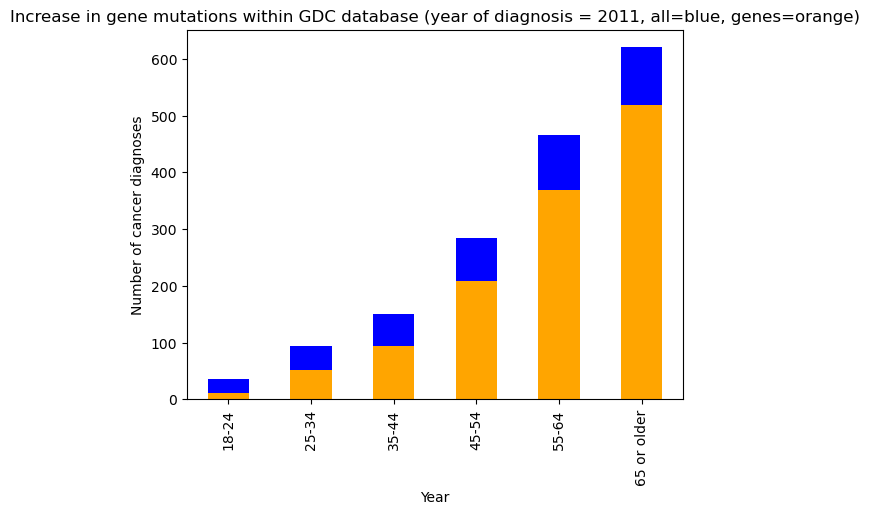

In [28]:
ax = gdc_2012_all['c'].plot(kind='bar', color = 'blue')
ax = gdc_2012_genes['c'].plot(kind='bar',color='orange')
ax.set(xlabel='Year', ylabel='Number of cancer diagnoses', title='Increase in gene mutations within GDC database (year of diagnosis = 2011, all=blue, genes=orange)');

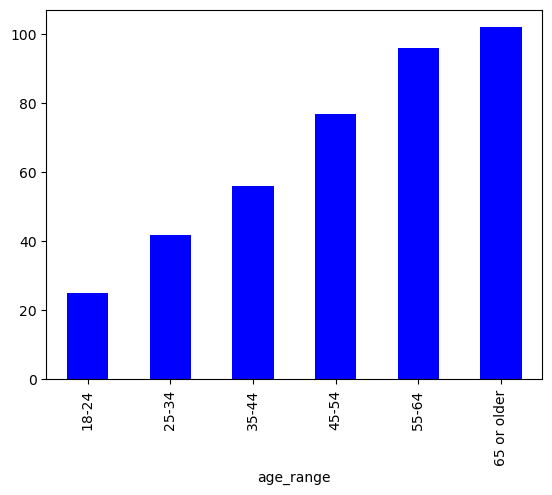

In [29]:
gdc_diff = gdc_2012_all['c']-gdc_2012_genes['c']
ax = gdc_diff.plot(kind='bar', color = 'blue')

c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

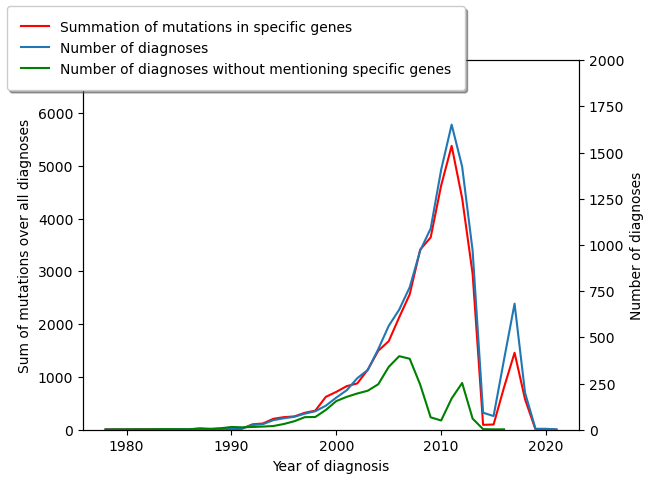

In [108]:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/gdc.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select year_of_diagnosis, count(*) as nrdiag, sum(sim), sum(p), sum(lpr), sum(mr), sum(a), sum(n), sum(m), sum(k), sum(l), sum(pc), sum(b), sum(s), sum(sim)+sum(p)+sum(lpr)+sum(mr)+sum(a)+sum(n)+sum(m)+sum(k)+sum(l)+sum(pc)+sum(b)+sum(s) as gene_sum, (sum(sim)+sum(p)+sum(lpr)+sum(mr)+sum(a)+sum(n)+sum(m)+sum(k)+sum(l)+sum(pc)+sum(b)+sum(s))/count(*) as gene_sum_per_nrdiag from (select d.year_of_diagnosis, c.\"gene.SIM1\" as sim, c.\"gene.POMC\" as p, c.\"gene.LEPR\" as lpr, c.\"gene.MRAP2\" as mr, c.\"gene.ADCY3\" as a, c.\"gene.NTRK2\" as n, c.\"gene.MC4R\" as m, c.\"gene.KSR2\" as k, c.\"gene.LEP\" as l, c.\"gene.PCSK1\" as pc, c.\"gene.BDNF\" as b, c.\"gene.SH2B1\" as s from cases c, diagnoses d where c.id = d.case_id and year_of_diagnosis is not null) group by year_of_diagnosis ;"
    gdc = pd.read_sql_query(sqlstatement_obese, conn)
    gdc['year_of_diagnosis'] = gdc['year_of_diagnosis'].astype(int)
    gdc_woGene = pd.read_sql_query('select year_of_diagnosis, count(*) as nrdiag from (select d.year_of_diagnosis, c."gene.SIM1"+c."gene.POMC"+c."gene.LEPR"+c."gene.MRAP2"+c."gene.ADCY3"+c."gene.NTRK2"+c."gene.MC4R"+c."gene.KSR2"+c."gene.LEP"+c."gene.PCSK1"+c."gene.BDNF"+c."gene.SH2B1" as gene_sum from cases c, diagnoses d where c.id = d.case_id and year_of_diagnosis is not null) where gene_sum = 0 group by year_of_diagnosis;', conn)
    gdc_woGene['year_of_diagnosis'] = gdc['year_of_diagnosis'].astype(int)

    
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.lineplot(x='year_of_diagnosis', y='nrdiag', data=gdc, ax=ax2, label='Number of diagnoses', legend=False)
sns.lineplot(x='year_of_diagnosis', y='nrdiag', data=gdc_woGene, ax=ax2, color='green', label='Number of diagnoses without mentioning specific genes', legend=False)
legax2 = plt.legend()
sns.lineplot(x='year_of_diagnosis', y='gene_sum', data=gdc, ax=ax, color='r', label='Summation of mutations in specific genes', legend=False)
legax = plt.legend()
legax2.remove()
legax.remove()
ax2.set_ylim(0, 2000)
ax.set_ylim(0, 7000)
ax.set(xlabel='Year of diagnosis', ylabel = 'Sum of mutations over all diagnoses')
ax2.set(ylabel='Number of diagnoses')


plt.figlegend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.show()